#**** Module 2 - Data Science: Elementos de análisis gráfico
"""
El siguiente script pretende mostrar el uso de diferentes tipos de gráfico 
para conocer como se encuentran nuestros datos 
"""

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 24 16:12:29 2021

@author: josflix
"""


"""
Antes de hacer el análisis defino la ruta del 
archivo de trabajo
"""
ruta = 'C:/Users/Dariana Vielma/Documents/UNAM/Modulo 3/'
file = 'GlucosaSangre.csv'
data = ruta + file

#Importo bibliotecas
import pandas as pd

#Cargo archivo (leo archivo)
df = pd.read_csv(data,  usecols=("sexo","grpedad","glc_antes","glc_despues")) 
#muestro información del mismo
#df.info()
df.head()

,sexo,grpedad,glc_antes,glc_despues
0,Male,30-45,119,99
1,Male,30-45,84,70
2,Male,30-45,88,73
3,Male,30-45,124,103
4,Male,30-45,121,100


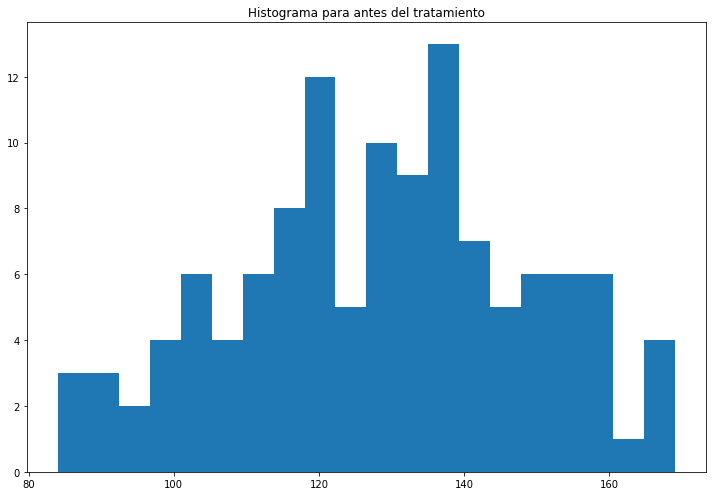

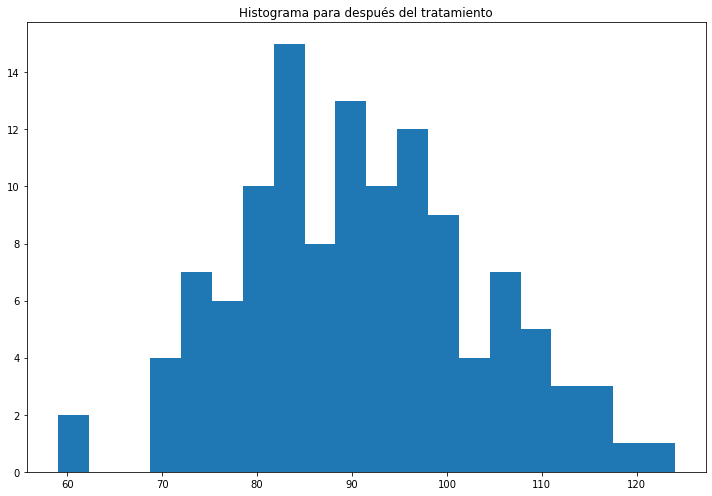

In [2]:
#Haciendo histogramas
import matplotlib.pyplot as plt
n_bins = 20

fig6, ax = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
ax.hist(df['glc_antes'], bins = n_bins)
ax.set_title('Histograma para antes del tratamiento') 

plt.show()

#Segundo gráfico
n_bins = 20
fig7, ax = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
ax.hist(df['glc_despues'], bins = n_bins)
ax.set_title('Histograma para después del tratamiento') 
plt.show()

<ipython-input-3-dda968e03978>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


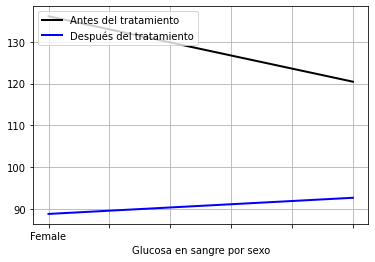

In [3]:
#Hago un gráfico de lineas para comparar por grupos (usamos la media)
import matplotlib.pyplot as plt
df.groupby('sexo').mean().loc[:,["glc_antes","glc_despues"]].plot(linewidth=2, color=['k','b'])

plt.legend(['Antes del tratamiento','Después del tratamiento'], loc='upper left')
plt.xlabel('Glucosa en sangre por sexo')

ax = plt.axes()
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True, which='major')

plt.show()


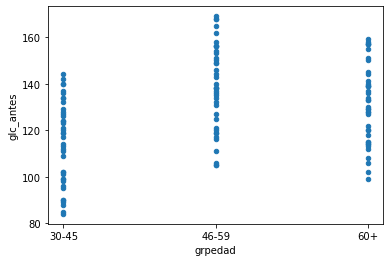

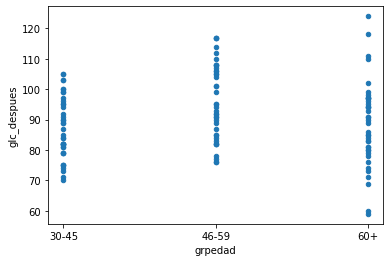

In [4]:

df.plot(kind='scatter', y='glc_antes', x='grpedad')
df.plot(kind='scatter', y='glc_despues', x='grpedad')
plt.show()

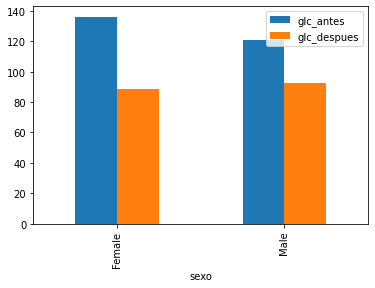

In [20]:
#Gráfico de barras
df.groupby('sexo').mean().loc[:,["glc_antes","glc_despues"]].plot(kind='bar')
plt.show()

"\n#Gráfico con notch\nfig3, ax3 = plt.subplots()\nax3.set_title('Después del tratamiento')\nax3.boxplot(df['glc_despues'], notch=True)\n\n"

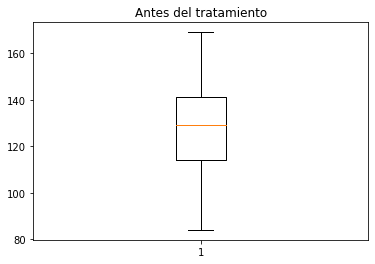

In [21]:
#Boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Antes del tratamiento')
ax1.boxplot(df['glc_antes'])

"""
fig2, ax2 = plt.subplots()
ax2.set_title('Después del tratamiento')
ax2.boxplot(df['glc_despues'])

"""
"""
#Gráfico con notch
fig3, ax3 = plt.subplots()
ax3.set_title('Después del tratamiento')
ax3.boxplot(df['glc_despues'], notch=True)

"""

[Text(1, 0, 'Antes del tratamiento'), Text(2, 0, 'Después del tratamiento')]

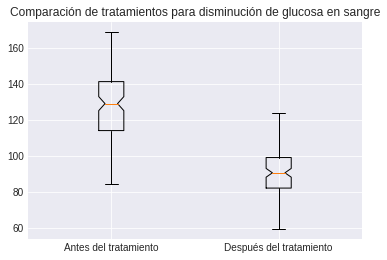

In [47]:

#Comparando dos tratamientos usando boxplot con notch
data = (df['glc_antes'],df['glc_despues'])
fig4, ax4 = plt.subplots()
ax4.set_title('Comparación de tratamientos para disminución de glucosa en sangre')
ax4.boxplot(data, notch=True)
# x-axis labels
ax4.set_xticklabels(['Antes del tratamiento', 'Después del tratamiento'])


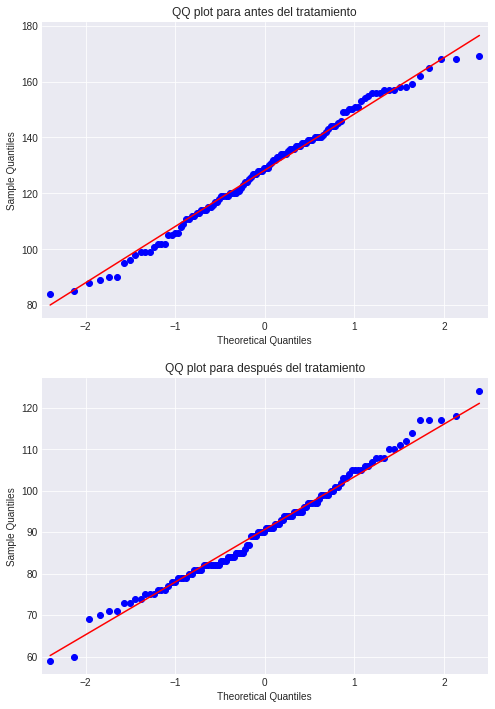

In [23]:

#Gráficos Q-Q
#import matplotlib
import statsmodels.api as sm
#import seaborn as sns

# Defino algunas características del gráfico
#matplotlib.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-darkgrid')

fig5, ax = plt.subplots(2, 1, figsize=(8, 12))
sm.qqplot(df['glc_antes'], line='s', ax=ax[0])
ax[0].set_title('QQ plot para antes del tratamiento')

sm.qqplot(df['glc_despues'], line='s', ax=ax[1])
ax[1].set_title('QQ plot para después del tratamiento')
plt.show()



In [24]:
df_mujeres = df[df['sexo'] == 'Female']
df_hombres = df[df['sexo'] == 'Male']
#sexo
#grpedad 1

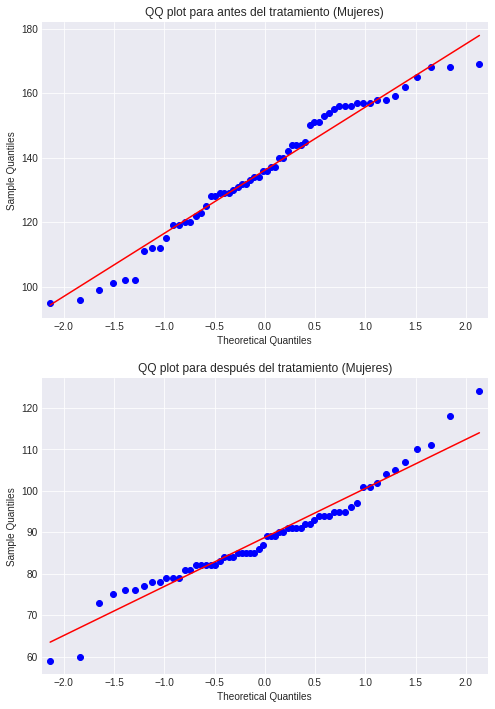

In [25]:
# Defino algunas características del gráfico
#matplotlib.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-darkgrid')

fig6, ax = plt.subplots(2, 1, figsize=(8, 12))
sm.qqplot(df_mujeres['glc_antes'], line='s', ax=ax[0])
ax[0].set_title('QQ plot para antes del tratamiento (Mujeres)')

sm.qqplot(df_mujeres['glc_despues'], line='s', ax=ax[1])
ax[1].set_title('QQ plot para después del tratamiento (Mujeres)')
plt.show()


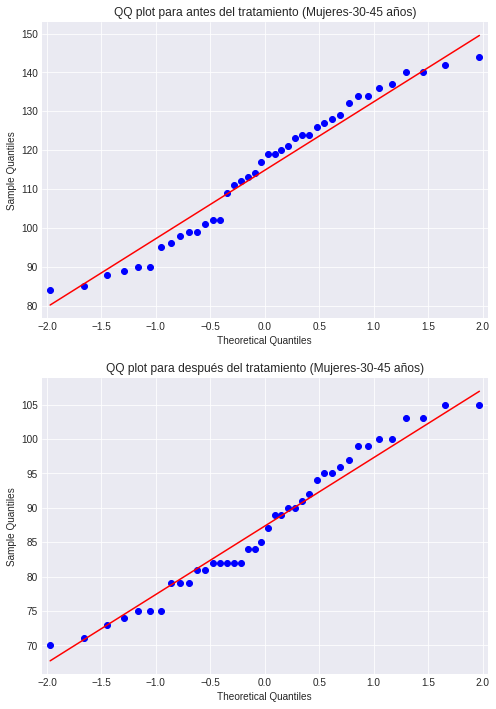

In [26]:
df_mujeres_30_45 = df[df['grpedad'] == '30-45']
df_mujeres_46_59 = df[df['grpedad'] == '46-59']
df_mujeres_Mayor60 = df[df['grpedad'] == '60+']


# Defino algunas características del gráfico
#matplotlib.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-darkgrid')

fig7, ax = plt.subplots(2, 1, figsize=(8, 12))
sm.qqplot(df_mujeres_30_45['glc_antes'], line='s', ax=ax[0])
ax[0].set_title('QQ plot para antes del tratamiento (Mujeres-30-45 años)')

sm.qqplot(df_mujeres_30_45['glc_despues'], line='s', ax=ax[1])
ax[1].set_title('QQ plot para después del tratamiento (Mujeres-30-45 años)')
plt.show()

In [45]:
#Prueba de normalidad de datos
from scipy.stats import normaltest 


#Prueba de normalidad
print( '\nPrueba de normalidad para los datos :\n', normaltest(df_mujeres_30_45['glc_antes'])) 


Prueba de normalidad para los datos :
 NormaltestResult(statistic=7.775754280718445, pvalue=0.020488794739313698)


In [48]:
import numpy as np
datos = np.random.normal(95, 20, 200) #creando muestra de datos
#print(datos)

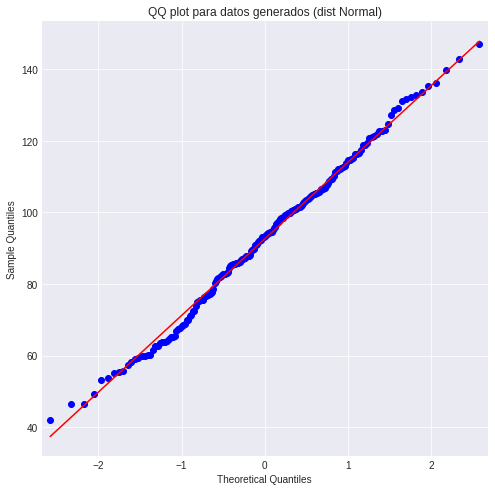

In [39]:
# Defino algunas características del gráfico
#matplotlib.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-darkgrid')

fig7, ax = plt.subplots( figsize=(8, 8))
sm.qqplot(datos, line='s', ax=ax)
ax.set_title('QQ plot para datos generados (dist Normal)')
plt.show()

In [43]:
#Prueba de normalidad de datos
from scipy.stats import normaltest 


#Prueba de normalidad
print( '\nPrueba de normalidad para los datos :\n', normaltest(datos)) 


Prueba de normalidad para los datos :
 NormaltestResult(statistic=5.3065873559137975, pvalue=0.07041889352024143)


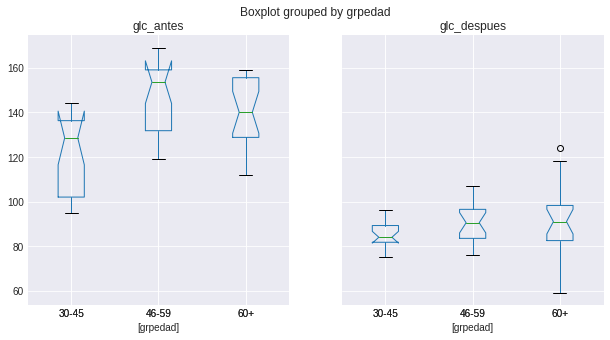

In [51]:
import scipy.stats as stats
#Multiples Boxplot
boxplot = df_mujeres.boxplot(by = ['grpedad'], notch=True,figsize=(10, 5))

In [53]:
#Haciendo prueba t
import scipy.stats as stats
from scipy.stats import levene

stat, p = levene(df_mujeres_30_45['glc_antes'], df_mujeres_30_45['glc_despues'])
p



0.00033290043899068865

In [60]:
#realice pruebas t de muestra con varianzas iguales
print('\nMedia de glucosa antes del tratamiento:\n', df['glc_antes'].mean())
print('\nMedia de glucosa después del tratamiento:\n', df['glc_despues'].mean())
print('\nDiferencia de medias de glucosa:\n', (df['glc_antes'].mean() - df['glc_despues'].mean()))
stats.ttest_ind(a=df['glc_antes'],b=df['glc_despues'],equal_var=False)


Media de glucosa antes del tratamiento:
 128.275

Media de glucosa después del tratamiento:
 90.68333333333334

Diferencia de medias de glucosa:
 37.59166666666667


Ttest_indResult(statistic=17.247236307695264, pvalue=1.711411433987865e-41)

In [52]:
from scipy import stats

stats.kruskal(df_mujeres_30_45['glc_antes'],df_mujeres_30_45['glc_despues'])

KruskalResult(statistic=37.24914544452134, pvalue=1.0396053814482077e-09)